In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gradient Boosting

## Read Data

In [0]:
#data from here https://www.kaggle.com/c/boston-housing/overview
df = pd.read_csv('https://raw.githubusercontent.com/shestakoff/hse_se_ml/master/2020/s11-boosting/data/boston_train.csv').drop(columns = 'ID')

 Prediction of house price in Boston.
 
 Why it's important? Because it can help people determine a fair price at home.

In [0]:
X = df.drop(columns = 'medv').values
y = df['medv'].values

In [50]:
X.shape

(333, 13)

## Before doing

definition of huber_loss: https://en.wikipedia.org/wiki/Huber_loss

Implement function which calculate $z_i$ from gradient boosting alogirithm (minus gradient of loss function). Implement for all possible loss function (mse, hl, logloss)

In hl use $\delta = 1$, assume that $MSE = \frac{1}{2}(r - y)^2$ and log_loss(sigmoid(r)) use $0$ and $1$ like class label

In [0]:
def calc_objective(r, target, loss = 'mse'):
    """
    Parameters
        ----------
        r : np.array
            value of f(x)
        target : np.array
            target
        loss : str
            loss function. Possible values : mse, hl(https://en.wikipedia.org/wiki/Huber_loss, logloss(sigmoid(r))
    """
    if loss == 'mse':
      return target - r

    elif loss == 'hl':
      res = []

      for i in range(len(r)):
        if np.abs(r[i] - target[i]) < 1:
          res.append(target[i] - r[i])
        else:
          res.append(np.sign(target[i] - r[i]) * int(target[i] > 0))

      return res

    elif loss == 'logloss':
      res = []
      target[target == 0] = -1

      for i in range(len(r)):
        v = 1. * target[i] * np.exp(-target[i] * r[i]) / (1 + np.exp(-target[i] * r[i]))
        res.append(v)

      return res

In [52]:
r = np.array([0, np.log(2), -np.log(9), np.log(4), np.log(19)])
target = np.array([0, 1, 0, 1, 1])
calc_objective(r, target, 'logloss')

[-0.5, 0.3333333333333333, -0.09999999999999998, 0.2, 0.05000000000000002]

In [0]:
#test your code

r = np.array([1, 2, 3, 4, 5])
target = np.array([10, 9, 8, 7, 6])
assert(np.allclose(calc_objective(r, target, 'mse'), np.array([9, 7, 5, 3, 1]), 0.00001))

r = np.array([2, 4, 7, 9, 13])
target = np.array([2.5, 6, 10, 6, 12.75])
assert(np.allclose(calc_objective(r, target, 'hl'), np.array([0.5, 1, 1, -1, -0.25]), 0.00001))

r = np.array([0, np.log(2), -np.log(9), np.log(4), np.log(19)])
target = np.array([0, 1, 0, 1, 1])
assert(np.allclose(calc_objective(r, target, 'logloss'), np.array([-0.5, 1. / 3, -0.1, 0.2, 0.05]), 0.00001))

Implement function which make one step of gradient boossting (fit new estimator)

In [0]:
def step(X, y, r, base_estimator, loss = 'mse'):
    """
    Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
        y : numpy.array, shape = (n_objects)
            1D array with the target variables
        r : np.array, shape = (n_ojects)
            f_{m-1}(X) (X matrix of features) - prediction of previous m-1 base_estimators
        base_estimator : estimator which you must fit
            has got method fit
        loss : str
            loss function. Possible values : mse, hl, logloss
            
        Return fitted base_estimator
    """
    shifts = calc_objective(r=r, target=y, loss=loss)
    est = base_estimator.fit(X, shifts)
    shifts_pred = base.estimator.predict(X)
    return r + shifts_pred


## Now use your knowledge and implement gradient boosting

# Task 1 (6 points)

Implement GradientBoostingRegressor as it was described in your lectures:

**Input**: training dataset $(x_{i},y_{i}),\,i=1,2,...N$; loss function $\mathcal{L}(f,y)$; learning rate $\nu$ and the number $M$ of successive additive approximations.

1. Fit initial approximation $f_{0}(x)$ (might be taken $f_{0}(x)\equiv0$)
2. For each step $m=1,2,...M$:

    1. calculate derivatives 
$$
z_{i}=-\frac{\partial\mathcal{L}(r,y_{i})}{\partial r}|_{r=f^{m-1}(x_{i})}
$$
    2. fit $h_{m}$ to $\{(x_{i},z_{i})\}_{i=1}^{N}$, for example by solving
$$
\sum_{n=1}^{N}(h_{m}(x_{n})-z_{n})^{2}\to\min_{h_{m}}
$$
    4. set $f_{m}(x)=f_{m-1}(x)+\nu h_{m}(x)$


**Output**: approximation function $f_{M}(x)=f_{0}(x)+\sum_{m=1}^{M}\nu h_{m}(x)$

Implement three loss functions:

    1 MSE
    2 Huber loss(https://en.wikipedia.org/wiki/Huber_loss)
    3 log_loss (in this case we solve classification task
In our case $h_m$ is DecisionTreeRegressor

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import clone

In [0]:
# You need to modify this class #

class GradientBoostingEstimator(object):
    def __init__(self, n_estimators, max_depth = 3, max_leaf_nodes = 8, n_subset_features = 5, random_state = 42,
                 loss = 'mse', learning_rate=0.1):
        """
        This is your random forest classifier.
        
        Parameters
        ----------
        n_estimators : int
            Number of estimators to train.
        max_depth : int
            max_depth of DecisionTreeRegressor
        max_leaf_nodes:
            max_leaf_nodes of DecisionTreeRegressor
        n_subset_features : int
            Number of random features to used to train a decision tree
        random_state : int
            random_state for decision tree
        loss : str
            Loss. Possible values : mse, hl, logloss
        learning_rate : float
            learning_rate (coef for next estimator on each step)
        """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.loss = loss
        self.base_estimator = DecisionTreeRegressor(max_depth=max_depth, 
                                                    max_leaf_nodes=max_leaf_nodes,
                                                    max_features=n_subset_features,
                                                    random_state=random_state)

    def fit(self, X, y):
        """
        Fit the classifier.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
        y : numpy.array, shape = (n_objects)
            1D array with the object labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        self.estimators = []
        shifts = np.zeros(X.shape[0], dtype=float)

        for i in range(self.n_estimators):
          curr_shifts = calc_objective(shifts, y, self.loss)

          est = clone(self.base_estimator)
          est.fit(X, curr_shifts)
          shifts_pred = est.predict(X)

          shifts += self.learning_rate * shifts_pred
          self.estimators.append(est)
            
    def predict(self, X):
      """
      This methods performs labels prediction for new objects.
      
      Parameters
      ----------
      X : numpy.array, shape = (n_objects, n_features)
          Matrix of objects that are described by their input features.
          
      Returns
      -------
      labels : numpy.array, shape = (n_objects)
          1D array with predicted labels. 
          For the classification labels are integers in {0, 1, 2, ...}.
      """
      labels = np.zeros(X.shape[0], dtype=float)
      for i in range(self.n_estimators):
        labels += self.learning_rate * self.estimators[i].predict(X)
      
      if self.loss == 'logloss':
        return labels
      return labels


    def predict_proba(self, X):
      """
      This methods performs probabilities prediction for new objects.
      
      Parameters
      ----------
      X : numpy.array, shape = (n_objects, n_features)
          Matrix of objects that are described by their input features.
          
      Returns
      -------
      proba : numpy.array, shape = (n_objects, n_classes)
          Array with predicted probabilities. 
      """
      proba = np.zeros(X.shape[0], dtype=float)
      for i in range(self.n_estimators):
        proba += self.learning_rate * self.estimators[i].predict(X)
      return 1. / (1 + np.exp(-proba))
      
    def _calc_objective(r, target, loss = 'mse'):
      """
      Parameters
          ----------
          r : np.array
              value of f(x)
          target : np.array
              target
          loss : str
              loss function. Possible values : mse, hl(https://en.wikipedia.org/wiki/Huber_loss, logloss(sigmoid(r))
      """
      if loss == 'mse':
        return target - r

      elif loss == 'hl':
        res = []
        for i in range(len(r)):
          if np.abs(r[i] - target[i]) < 1:
            res.append(target[i] - r[i])
          else:
            res.append(np.sign(target[i] - r[i]) * int(target[i] > 0))
        return res

      elif loss == 'logloss':
        target[target == 0] = -1
        return 1. * target * np.exp(-target * r) / (1 + np.exp(-target * r))

### Important
When you select `learning_rate` and `n_estimators`, follow the default values of the tree parameters

# Task 2 (2 points)

Split your data on train, valid sample (fix random_seed). Choose the best `learning_rate` and `n_estimators` for every loss (for logloss use data from previous HW). For regression task (mse_loss, huber_loss) use MSE on valid sample as quality measure to choose optimal params, for classification task (logloss) use ROC-AUC.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score

## MSE

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
est_mse = GradientBoostingEstimator(n_estimators=230, learning_rate=0.5, random_state=42)
est_mse.fit(X_train, y_train)

y_pred_mse = est_mse.predict(X_test)
mean_squared_error(y_test, y_pred_mse)

11.215830366206253

## HL

In [59]:
est_hl = GradientBoostingEstimator(n_estimators=200, learning_rate=0.44, loss='hl', random_state=42)
est_hl.fit(X_train, y_train)

y_pred_hl = est_hl.predict(X_test)
mean_squared_error(y_test, y_pred_hl)

14.539032831687198

## LogLoss

In [0]:
d_X_log = pd.read_csv('./data/x_train.csv', sep=';')
d_y_log = pd.read_csv('./data/y_train.csv', sep=';', header=None, names=['target'])
X_log = d_X_log.values
y_log = d_y_log['target'].values

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.3, random_state=42)

In [61]:
est_logloss = GradientBoostingEstimator(n_estimators=100, learning_rate=0.5, loss='logloss', random_state=42)
est_logloss.fit(X_train_log, y_train_log)

y_pred_logloss = est_logloss.predict_proba(X_test_log)
roc_auc_score(y_test_log, y_pred_logloss)

0.8853905280761745

# Task 3 (1 point)
Plot dependecy of loss value (in classification task plot roc-auc score) from `n_estimators` of your boosting. Use `learning_rate=0.1`.

In [0]:
from tqdm import tqdm_notebook

In [0]:
lv_mse_train, lv_mse_test = [], []
lv_hl_train, lv_hl_test = [], []
lv_log_train, lv_log_test = [], []

In [34]:
for i in tqdm_notebook(range(300)):
  est_mse = GradientBoostingEstimator(n_estimators=i, 
                                      learning_rate=0.1, 
                                      random_state=42)
  est_hl = GradientBoostingEstimator(n_estimators=i, 
                                     learning_rate=0.1, 
                                     random_state=42, 
                                     loss="hl")
  est_mse.fit(X_train, y_train)
  est_hl.fit(X_train, y_train)

  lv_mse_train.append(mean_squared_error(y_train, est_mse.predict(X_train)))
  lv_hl_train.append(mean_squared_error(y_train, est_hl.predict(X_train)))

  lv_mse_test.append(mean_squared_error(y_test, est_mse.predict(X_test)))
  lv_hl_test.append(mean_squared_error(y_test, est_hl.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [35]:
for i in tqdm_notebook(range(200)):
  est_log = GradientBoostingEstimator(n_estimators=i, learning_rate=0.1, random_state=42, loss="logloss")
  est_log.fit(X_train_log, y_train_log)
  lv_log_train.append(roc_auc_score(y_train_log, est_log.predict_proba(X_train_log)))
  lv_log_test.append(roc_auc_score(y_test_log, est_log.predict_proba(X_test_log)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


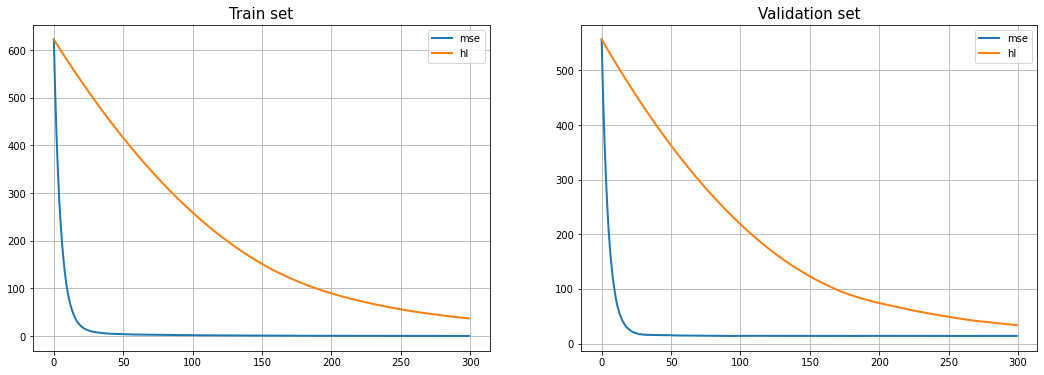

In [37]:
plt.rcParams['figure.figsize'] = (18, 6)
fig, ax = plt.subplots(1,2)

n_est = range(300)

ax[0].plot(n_est, lv_mse_train, linewidth=2, label='mse')
ax[0].plot(n_est, lv_hl_train, linewidth=2, label='hl')
ax[0].set_title('Train set', size = 15)
ax[0].legend(loc = 'upper right')
    
ax[1].plot(n_est, lv_mse_test, linewidth=2, label='mse')
ax[1].plot(n_est, lv_hl_test, linewidth=2, label='hl')
ax[1].set_title('Validation set', size = 15)
ax[1].legend(loc = 'upper right')

ax[0].grid(b=1)
ax[1].grid(b=1)

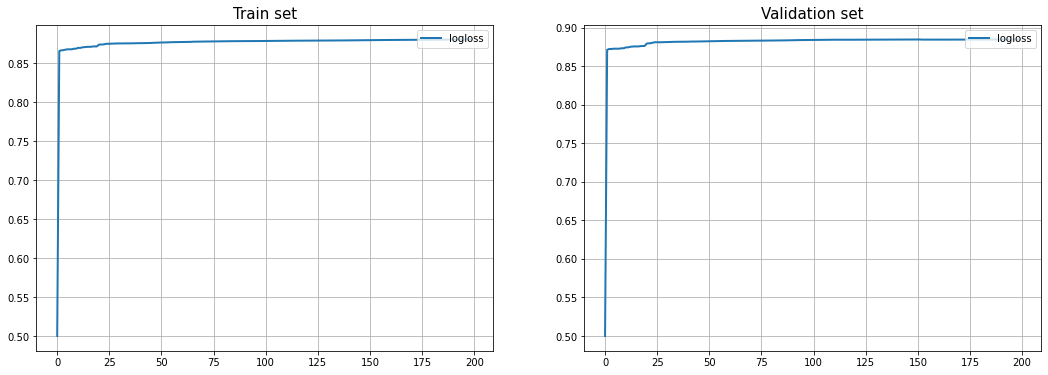

In [39]:
plt.rcParams['figure.figsize'] = (18, 6)
fig, ax = plt.subplots(1,2)

ax[0].plot(range(200), lv_log_train, linewidth=2, label='logloss')
ax[0].set_title('Train set', size = 15)
ax[0].legend(loc = 'upper right')

ax[1].plot(range(200), lv_log_test, linewidth=2, label='logloss')
ax[1].set_title('Validation set', size = 15)
ax[1].legend(loc = 'upper right')

ax[0].grid(b=1)
ax[1].grid(b=1)

# Task 4 (1 point)
Plot dependecy of loss value (in classification task plot roc-auc score) from `learning_rate` of your boosting. Use `n_estimators=100`.

In [0]:
learning_rates = np.arange(0, 1, 0.01)
lv_mse_train, lv_mse_test = [], []
lv_hl_train, lv_hl_test = [], []
lv_log_train, lv_log_test = [], []

In [41]:
for i in tqdm_notebook(range(len(learning_rates))):
  est_mse = GradientBoostingEstimator(n_estimators=100, 
                                      learning_rate=learning_rates[i], 
                                      random_state=42)
  est_mse.fit(X_train, y_train)
  lv_mse_train.append(mean_squared_error(y_train, est_mse.predict(X_train)))
  lv_mse_test.append(mean_squared_error(y_test, est_mse.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [42]:
for i in tqdm_notebook(range(len(learning_rates))):
  est_hl = GradientBoostingEstimator(n_estimators=100, 
                                     learning_rate=learning_rates[i],
                                     random_state=42, 
                                     loss="hl")
  est_hl.fit(X_train, y_train)
  lv_hl_train.append(mean_squared_error(y_train, est_hl.predict(X_train)))
  lv_hl_test.append(mean_squared_error(y_test, est_hl.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [43]:
for i in tqdm_notebook(range(len(learning_rates))):
  est_log = GradientBoostingEstimator(n_estimators=n_estimators[i], 
                                      learning_rate=0.1, 
                                      random_state=42, 
                                      loss="logloss")
  est_log.fit(X_train_log, y_train_log)
  lv_log_train.append(roc_auc_score(y_train_log, est_log.predict_proba(X_train_log)))
  lv_log_test.append(roc_auc_score(y_test_log, est_log.predict_proba(X_test_log)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


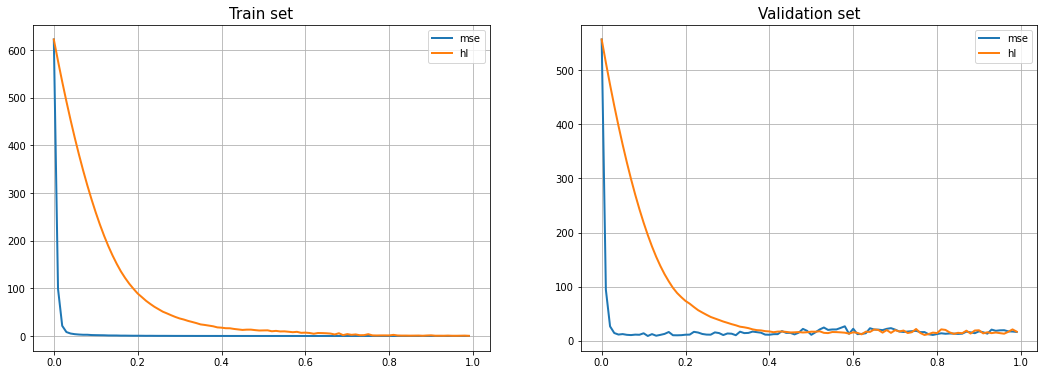

In [45]:
plt.rcParams['figure.figsize'] = (18, 6)
fig, ax = plt.subplots(1,2)

ax[0].plot(learning_rates, lv_mse_train, linewidth=2, label='mse')
ax[0].plot(learning_rates, lv_hl_train, linewidth=2, label='hl')
ax[0].set_title('Train set', size = 15)
ax[0].legend(loc = 'upper right')
    
ax[1].plot(learning_rates, lv_mse_test, linewidth=2, label='mse')
ax[1].plot(learning_rates, lv_hl_test, linewidth=2, label='hl')
ax[1].set_title('Validation set', size = 15)
ax[1].legend(loc = 'upper right')

ax[0].grid(b=1)
ax[1].grid(b=1)

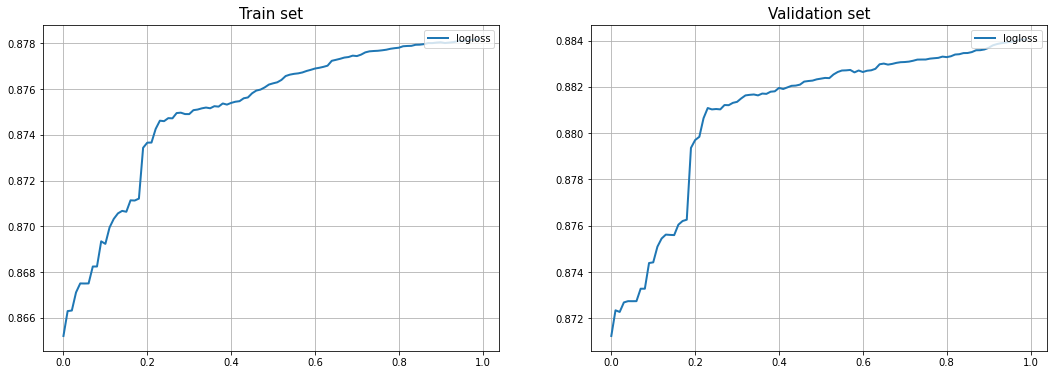

In [46]:
plt.rcParams['figure.figsize'] = (18, 6)
fig, ax = plt.subplots(1,2)

ax[0].plot(learning_rates, lv_log_train, linewidth=2, label='logloss')
ax[0].set_title('Train set', size = 15)
ax[0].legend(loc = 'upper right')
    
ax[1].plot(learning_rates, lv_log_test, linewidth=2, label='logloss')
ax[1].set_title('Validation set', size = 15)
ax[1].legend(loc = 'upper right')

ax[0].grid(b=1)
ax[1].grid(b=1)